Making feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import helpful_function as hf
import copy

In [ ]:
sec_price_df = pd.read_csv('test/test_price_sec.csv')
target_df = pd.read_csv('test/test_target.csv')
preprocessing_df = pd.read_csv('test/test_preprocessing.csv')
daily_price_df = pd.read_csv('test/test_price_daily.csv')

In [380]:
target_df = pd.read_csv('test/test_target_1208.csv')
preprocessing_df = pd.read_csv('test/test_preprocessing_1208.csv')
daily_price_df = pd.read_csv('test/test_price_1208_21_day.csv')
target_df['date'] = target_df['date'].astype(str).apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:])

In [381]:
target_df

,date,transaction_count,transaction_amount,transaction_flag
0,2021-01-01,2,9.688319e+13,1
1,2021-01-02,4,3.744000e+14,1
2,2021-01-03,1,2.040000e+12,1
3,2021-01-04,0,0.000000e+00,0
4,2021-01-05,0,0.000000e+00,0
...,...,...,...,...
360,2021-12-27,8,1.008189e+13,1
361,2021-12-28,2,2.520441e+12,1
362,2021-12-29,8,1.008175e+13,1
363,2021-12-30,5,6.181513e+12,1


In [3]:
target_df.transaction_flag.value_counts()

transaction_flag
0    207
1    158
Name: count, dtype: int64

In [4]:
sec_price_df = pd.DataFrame()

for i in range(1, 13):
    temp_sec_price_df = pd.read_csv('test/price/test_price_1208_21_{}.csv'.format(i))
    sec_price_df = pd.concat([sec_price_df, temp_sec_price_df])

sec_price_columns_list = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore', 'spread']
sec_price_df.columns = sec_price_columns_list
sec_price_df['time'] = sec_price_df['open_time'].apply(lambda x: hf.ts_to_datetime(x))
# sec_price_df = sec_price_df[(sec_price_df['time'] >= '2021-01-01 00:00:00')&(sec_price_df['time'] < '2022-01-01 00:00:00')]

In [5]:
sec_price_df.head()
sec_price_df.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,spread,time
2678354,1640995195000,46216.94,46216.94,46216.93,46216.94,0.01090,1640995195999,503.764614,5,0.00771,356.332607,0,0.000031,2021-12-31 23:59:55
2678355,1640995196000,46216.94,46216.94,46216.93,46216.93,0.15614,1640995196999,7216.311552,4,0.01021,471.874957,0,0.000031,2021-12-31 23:59:56
2678356,1640995197000,46216.94,46216.94,46200.00,46200.01,4.42605,1640995197999,204507.095488,32,0.00176,81.341814,0,0.000031,2021-12-31 23:59:57
2678357,1640995198000,46200.02,46200.05,46200.00,46200.05,0.14667,1640995198999,6776.155813,25,0.07673,3544.927652,0,0.000033,2021-12-31 23:59:58
2678358,1640995199000,46200.19,46216.93,46200.19,46216.93,0.94597,1640995199999,43713.672012,48,0.51528,23808.506737,0,0.000019,2021-12-31 23:59:59


In [6]:
pd.set_option('display.max_columns', 0)

In [7]:
daily_price_columns_list = ['date', 'open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'returns']

daily_price_df.columns = daily_price_columns_list
daily_price_df

,date,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,returns
0,2021-01-01,28923.63,29600.00,28690.17,29327.84,36168.957767,1.057564e+09,852171,19033.417799,5.566839e+08,0.013975
1,2021-01-02,29327.83,31567.89,28624.57,31290.53,72902.222867,2.181105e+09,1500521,38627.981848,1.156484e+09,0.066923
2,2021-01-03,31290.53,34778.11,30300.00,33811.54,149782.407229,4.940334e+09,2633676,74640.218253,2.462365e+09,0.080568
3,2021-01-04,33811.54,33873.45,28130.00,32113.68,150078.830016,4.799815e+09,2831323,72353.796528,2.316132e+09,-0.050215
4,2021-01-05,32113.68,32853.38,29900.00,32342.33,106816.247165,3.363103e+09,2292287,54942.538433,1.731277e+09,0.007120
...,...,...,...,...,...,...,...,...,...,...,...
372,2021-12-28,51502.55,52088.00,48301.88,49078.29,42758.034710,2.134883e+09,1319544,20825.050010,1.040156e+09,-0.047071
373,2021-12-29,49078.29,49235.95,46586.62,47826.00,39904.760040,1.904442e+09,1155811,19275.626000,9.198241e+08,-0.025516
374,2021-12-30,47826.00,48038.92,45900.00,47345.03,35428.936160,1.667097e+09,1034116,16918.710780,7.962462e+08,-0.010057
375,2021-12-31,47345.02,48548.26,46729.00,47976.51,28910.814060,1.377147e+09,922376,14495.434240,6.904177e+08,0.013338


In [8]:
# sec_price_df.head()
# sec_price_columns_list = ['time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore', 'returns']

# sec_price_df.columns = sec_price_columns_list
# sec_price_df = sec_price_df.drop(columns=['close_time', 'ignore'])
# # sec_price_df.head()

ValueError: Length mismatch: Expected axis has 14 elements, new values have 13 elements

In [9]:
target_df['returns'] = daily_price_df['returns']

In [10]:
target_df['close'] = daily_price_df['close']

In [11]:
target_df['abs_returns'] = target_df['returns'].abs()

In [12]:
target_df['volume'] = daily_price_df['volume']
target_df['open'] = daily_price_df['open']
target_df['high'] = daily_price_df['high']
target_df['low'] = daily_price_df['low']
target_df['high_low'] = target_df['high'] - target_df['low']

In [13]:
sec_price_df['volume_weighted_price'] = sec_price_df['close'] * sec_price_df['volume']

In [14]:
sec_price_df['morning_flag'] = sec_price_df['time'].apply(lambda x: 1 if ((x[-8:] >= '06:00:00') and (x[-8:] < '12:00:00')) else 0)
sec_price_df['afternoon_flag'] = sec_price_df['time'].apply(lambda x: 1 if ((x[-8:] >= '12:00:00') and (x[-8:] < '18:00:00')) else 0)
sec_price_df['night_flag'] = sec_price_df['time'].apply(lambda x: 1 if ((x[-8:] >= '18:00:00') and (x[-8:] <= '23:59:59')) else 0)
sec_price_df['dawn_flag'] = sec_price_df['time'].apply(lambda x: 1 if ((x[-8:] >= '00:00:00') and (x[-8:] < '06:00:00')) else 0)

In [15]:
sec_price_df['returns'] = sec_price_df['close'].pct_change()
sec_price_df = sec_price_df.dropna()
sec_price_df['returns_for_cal'] = sec_price_df['returns']+1

C:\Users\slaye\AppData\Local\Temp\ipykernel_10216\829001265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec_price_df['returns_for_cal'] = sec_price_df['returns']+1


In [16]:
sec_price_df['date'] = pd.to_datetime(sec_price_df['time']).dt.date
daily_avg_trades = sec_price_df.groupby('date')['number_of_trades'].mean()
daily_sum_trades = sec_price_df.groupby('date')['number_of_trades'].sum()
daily_sum_taker_buy_base_asset_volume = sec_price_df.groupby('date')['taker_buy_base_asset_volume'].sum()
daily_sum_taker_buy_quote_asset_volume = sec_price_df.groupby('date')['taker_buy_quote_asset_volume'].sum()
daily_avg_spread = sec_price_df.groupby('date')['spread'].mean()
daily_quote_asset_volume = sec_price_df.groupby('date')['quote_asset_volume'].sum()
daily_avg_quote_asset_volume = sec_price_df.groupby('date')['quote_asset_volume'].mean()
daily_low = sec_price_df.groupby('date')['low'].min()
daily_high = sec_price_df.groupby('date')['high'].max()
daily_avg_price = sec_price_df.groupby('date')['close'].mean()
daily_vwap = sec_price_df.groupby('date')['volume_weighted_price'].sum() / sec_price_df.groupby('date')['volume'].sum()
daily_avg_volume = sec_price_df.groupby('date')['volume'].mean()
daily_morning_returns = (sec_price_df[sec_price_df['morning_flag'] == 1].groupby('date')['returns_for_cal']).prod()-1
daily_afternoon_returns = (sec_price_df[sec_price_df['afternoon_flag'] == 1].groupby('date')['returns_for_cal']).prod()-1
daily_night_returns = (sec_price_df[sec_price_df['night_flag'] == 1].groupby('date')['returns_for_cal']).prod()-1
daily_dawn_returns = (sec_price_df[sec_price_df['dawn_flag'] == 1].groupby('date')['returns_for_cal']).prod()-1

daily_avg_morning_returns = sec_price_df[sec_price_df['morning_flag'] == 1].groupby('date')['returns'].mean()
daily_avg_afternoon_returns = sec_price_df[sec_price_df['afternoon_flag'] == 1].groupby('date')['returns'].mean()
daily_avg_night_returns = sec_price_df[sec_price_df['night_flag'] == 1].groupby('date')['returns'].mean()
daily_avg_dawn_returns = sec_price_df[sec_price_df['dawn_flag'] == 1].groupby('date')['returns'].mean()

C:\Users\slaye\AppData\Local\Temp\ipykernel_10216\3430703905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec_price_df['date'] = pd.to_datetime(sec_price_df['time']).dt.date


In [17]:
daily_avg_morning_volume = sec_price_df[sec_price_df['morning_flag'] == 1].groupby('date')['volume'].mean()
daily_avg_afternoon_volume = sec_price_df[sec_price_df['afternoon_flag'] == 1].groupby('date')['volume'].mean()
daily_avg_night_volume = sec_price_df[sec_price_df['night_flag'] == 1].groupby('date')['volume'].mean()
daily_avg_dawn_volume = sec_price_df[sec_price_df['dawn_flag'] == 1].groupby('date')['volume'].mean()
daily_morning_volatility = sec_price_df[sec_price_df['morning_flag'] == 1].groupby('date')['returns'].std()
daily_afternoon_volatility = sec_price_df[sec_price_df['afternoon_flag'] == 1].groupby('date')['returns'].std()
daily_night_volatility = sec_price_df[sec_price_df['night_flag'] == 1].groupby('date')['returns'].std()
daily_dawn_volatility = sec_price_df[sec_price_df['dawn_flag'] == 1].groupby('date')['returns'].std()
daily_volatility = sec_price_df.groupby('date')['returns'].std()

In [18]:
target_df['daily_avg_trades'] = daily_avg_trades.values
target_df['daily_sum_trades'] = daily_sum_trades.values
target_df['daily_sum_taker_buy_base_asset_volume'] = daily_sum_taker_buy_base_asset_volume.values
target_df['daily_sum_taker_buy_quote_asset_volume'] = daily_sum_taker_buy_quote_asset_volume.values
target_df['daily_avg_spread'] = daily_avg_spread.values
target_df['daily_quote_asset_volume'] = daily_quote_asset_volume.values
target_df['daily_avg_quote_asset_volume'] = daily_avg_quote_asset_volume.values
target_df['daily_low'] = daily_low.values
target_df['daily_high'] = daily_high.values
target_df['daily_avg_price'] = daily_avg_price.values
target_df['daily_vwap'] = daily_vwap.values
target_df['daily_avg_volume'] = daily_avg_volume.values
target_df['daily_morning_returns'] = daily_morning_returns.values
target_df['daily_afternoon_returns'] = daily_afternoon_returns.values
target_df['daily_night_returns'] = daily_night_returns.values
target_df['daily_dawn_returns'] = daily_dawn_returns.values
target_df['daily_avg_morning_returns'] = daily_avg_morning_returns.values
target_df['daily_avg_afternoon_returns'] = daily_avg_afternoon_returns.values
target_df['daily_avg_night_returns'] = daily_avg_night_returns.values
target_df['daily_avg_dawn_returns'] = daily_avg_dawn_returns.values
target_df['daily_avg_morning_volume'] = daily_avg_morning_volume.values
target_df['daily_avg_afternoon_volume'] = daily_avg_afternoon_volume.values
target_df['daily_avg_night_volume'] = daily_avg_night_volume.values
target_df['daily_avg_dawn_volume'] = daily_avg_dawn_volume.values
target_df['daily_morning_volatility'] = daily_morning_volatility.values
target_df['daily_afternoon_volatility'] = daily_afternoon_volatility.values
target_df['daily_night_volatility'] = daily_night_volatility.values
target_df['daily_dawn_volatility'] = daily_dawn_volatility.values
target_df['daily_volatility'] = daily_volatility.values

In [19]:
target_df

,date,transaction_count,transaction_amount,transaction_flag,returns,close,abs_returns,volume,open,high,low,high_low,daily_avg_trades,daily_sum_trades,daily_sum_taker_buy_base_asset_volume,daily_sum_taker_buy_quote_asset_volume,daily_avg_spread,daily_quote_asset_volume,daily_avg_quote_asset_volume,daily_low,daily_high,daily_avg_price,daily_vwap,daily_avg_volume,daily_morning_returns,daily_afternoon_returns,daily_night_returns,daily_dawn_returns,daily_avg_morning_returns,daily_avg_afternoon_returns,daily_avg_night_returns,daily_avg_dawn_returns,daily_avg_morning_volume,daily_avg_afternoon_volume,daily_avg_night_volume,daily_avg_dawn_volume,daily_morning_volatility,daily_afternoon_volatility,daily_night_volatility,daily_dawn_volatility,daily_volatility
0,2021-01-01,2,9.688319e+13,1,0.013975,29327.84,0.013975,36168.957767,28923.63,29600.00,28690.17,909.83,15.218848,1314878,27454.988281,8.022242e+08,0.000028,1.582496e+09,18316.345224,28624.57,29600.00,29212.925838,29207.168119,0.627119,0.004333,-0.007978,0.008668,0.009249,2.046216e-07,-3.646507e-07,4.044323e-07,4.323588e-07,0.559473,0.731030,0.520352,0.697628,0.000094,0.000111,0.000099,0.000110,0.000104
1,2021-01-02,4,3.744000e+14,1,0.066923,31290.53,0.066923,72902.222867,29327.83,31567.89,28624.57,2943.32,25.994468,2245922,67446.305246,2.110335e+09,0.000065,4.073842e+09,47150.950968,28946.53,33300.00,30694.541181,31339.198481,1.504559,0.005577,0.104250,-0.020654,0.008806,2.629675e-07,4.620890e-06,-9.149101e-07,4.097032e-07,0.709484,2.586270,2.205785,0.516695,0.000105,0.000244,0.000320,0.000087,0.000213
2,2021-01-03,1,2.040000e+12,1,0.080568,33811.54,0.080568,149782.407229,31290.53,34778.11,30300.00,4478.11,27.427060,2369698,59750.332871,2.004428e+09,0.000079,4.057598e+09,46962.944739,31962.99,34778.11,33449.583730,33545.837360,1.399972,0.019398,-0.043711,0.002758,0.049112,9.142759e-07,-2.040671e-06,1.486381e-07,2.236047e-06,1.627154,1.790353,1.039721,1.142659,0.000223,0.000239,0.000205,0.000181,0.000213
3,2021-01-04,0,0.000000e+00,0,-0.050215,32113.68,0.050215,150078.830016,33811.54,33873.45,28130.00,5743.45,30.583426,2642408,69088.469230,2.173435e+09,0.000121,4.429010e+09,51261.693862,28130.00,33600.00,31826.481466,31431.117838,1.630786,-0.063083,0.009144,0.031090,-0.005668,-2.759788e-06,4.608122e-07,1.437108e-06,-2.483983e-07,2.816325,1.839324,0.863119,1.004376,0.000717,0.000281,0.000198,0.000172,0.000407
4,2021-01-05,0,0.000000e+00,0,0.007120,32342.33,0.007120,106816.247165,32113.68,32853.38,29900.00,2953.38,29.245961,2526851,59691.754755,1.927195e+09,0.000073,3.743617e+09,43328.902137,29900.00,34360.00,32221.813669,32258.733179,1.343171,0.044040,0.030402,0.036857,-0.048531,2.021824e-06,1.406496e-06,1.702368e-06,-2.263027e-06,1.049916,1.146717,1.583017,1.593034,0.000230,0.000200,0.000231,0.000283,0.000238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,8,1.008189e+13,1,0.024629,48536.66,0.024629,49530.485790,47369.99,49500.00,46547.00,2953.00,11.682998,1009411,14436.093220,7.383692e+08,0.000019,1.472065e+09,17037.792083,50449.00,52088.00,51058.461564,51127.215752,0.333243,-0.001840,0.021546,-0.022210,0.001527,-8.317135e-08,9.905213e-07,-1.036887e-06,7.336628e-08,0.254562,0.469229,0.350895,0.258287,0.000065,0.000085,0.000077,0.000074,0.000075
361,2021-12-28,2,2.520441e+12,1,-0.052860,45971.01,0.052860,37372.927420,48536.65,48718.59,45750.00,2968.59,15.576088,1345774,21743.170130,1.063172e+09,0.000026,2.242102e+09,25950.257187,47313.01,50704.05,48854.837238,48896.213338,0.530710,-0.000010,-0.023779,-0.010133,-0.029596,5.213535e-09,-1.105576e-06,-4.660603e-07,-1.382902e-06,0.447776,0.574707,0.386613,0.713744,0.000107,0.000131,0.000104,0.000126,0.000118
362,2021-12-29,8,1.008175e+13,1,0.022579,47009.02,0.022579,36357.689870,45971.02,47440.10,45456.00,1984.10,12.894375,1114074,19089.619100,9.059697e+08,0.000025,1.873786e+09,21687.333001,46096.99,4813

In [20]:
# target_df.to_csv('test/test_set_1208.csv', index=False)

In [424]:
target_df = pd.read_csv('test/test_set_1208.csv')

In [425]:
target_df

,date,transaction_count,transaction_amount,transaction_flag,returns,close,abs_returns,volume,open,high,...,daily_avg_dawn_returns,daily_avg_morning_volume,daily_avg_afternoon_volume,daily_avg_night_volume,daily_avg_dawn_volume,daily_morning_volatility,daily_afternoon_volatility,daily_night_volatility,daily_dawn_volatility,daily_volatility
0,2021-01-01,2,9.688319e+13,1,0.013975,29327.84,0.013975,36168.957767,28923.63,29600.00,...,4.323588e-07,0.559473,0.731030,0.520352,0.697628,0.000094,0.000111,0.000099,0.000110,0.000104
1,2021-01-02,4,3.744000e+14,1,0.066923,31290.53,0.066923,72902.222867,29327.83,31567.89,...,4.097032e-07,0.709484,2.586270,2.205785,0.516695,0.000105,0.000244,0.000320,0.000087,0.000213
2,2021-01-03,1,2.040000e+12,1,0.080568,33811.54,0.080568,149782.407229,31290.53,34778.11,...,2.236047e-06,1.627154,1.790353,1.039721,1.142659,0.000223,0.000239,0.000205,0.000181,0.000213
3,2021-01-04,0,0.000000e+00,0,-0.050215,32113.68,0.050215,150078.830016,33811.54,33873.45,...,-2.483983e-07,2.816325,1.839324,0.863119,1.004376,0.000717,0.000281,0.000198,0.000172,0.000407
4,2021-01-05,0,0.000000e+00,0,0.007120,32342.33,0.007120,106816.247165,32113.68,32853.38,...,-2.263027e-06,1.049916,1.146717,1.583017,1.593034,0.000230,0.000200,0.000231,0.000283,0.000238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,8,1.008189e+13,1,0.024629,48536.66,0.024629,49530.485790,47369.99,49500.00,...,7.336628e-08,0.254562,0.469229,0.350895,0.258287,0.000065,0.000085,0.000077,0.000074,0.000075
361,2021-12-28,2,2.520441e+12,1,-0.052860,45971.01,0.052860,37372.927420,48536.65,48718.59,...,-1.382902e-06,0.447776,0.574707,0.386613,0.713744,0.000107,0.000131,0.000104,0.000126,0.000118
362,2021-12-29,8,1.008175e+13,1,0.022579,47009.02,0.022579,36357.689870,45971.02,47440.10,...,3.468357e-07,0.355661,0.679521,0.472957,0.320512,0.000079,0.000130,0.000131,0.000071,0.000106
363,2021-12-30,5,6.181513e+12,1,0.008172,47393.20,0.008172,28286.992960,47009.03,48300.01,...,2.994568e-07,0.327005,0.390545,0.283874,0.403775,0.000081,0.000088,0.000097,0.000114,0.000096


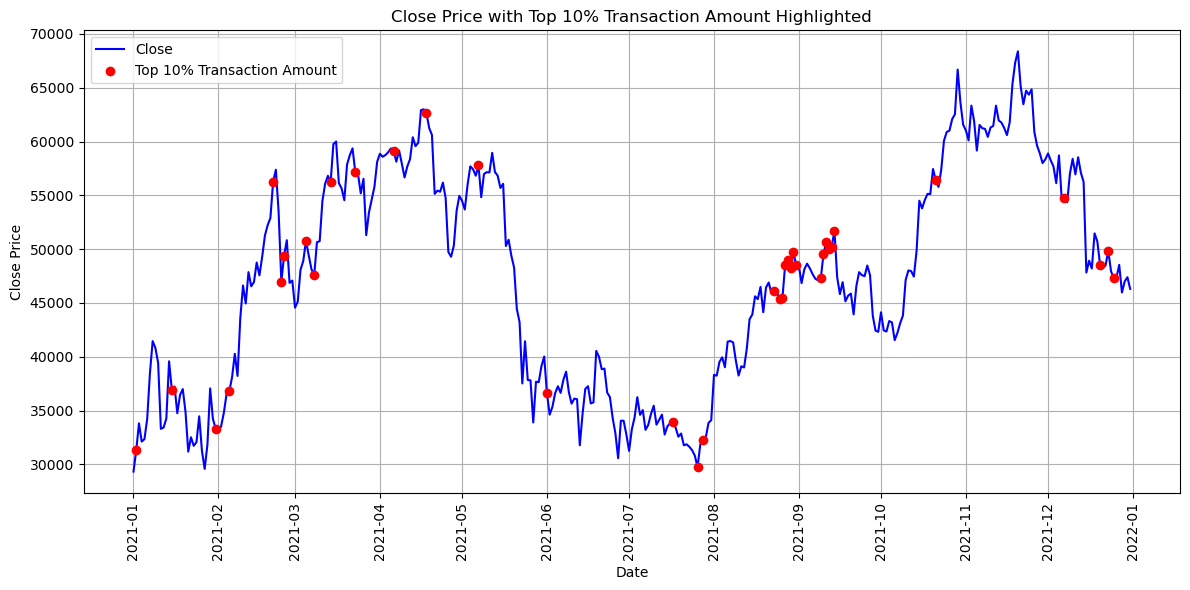

In [323]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 'date' 열을 datetime 형식으로 변환
target_df['date'] = pd.to_datetime(target_df['date'])

# transaction_amount의 상위 10% 기준 계산
threshold = target_df['transaction_amount'].quantile(0.90)

# 상위 10% 조건에 맞는 인덱스 필터링
high_transaction_days = target_df[target_df['transaction_amount'] > threshold]

# 전체 close 데이터 그래프
plt.figure(figsize=(12, 6))
plt.plot(target_df['date'], target_df['close'], label='Close', color='blue')  # X축: 'date', Y축: 'close'

# 상위 10% transaction_amount가 발생한 날의 close 값에 점 찍기
plt.scatter(high_transaction_days['date'], high_transaction_days['close'], color='red', label='Top 10% Transaction Amount', zorder=5)  # X축: 'date', Y축: 'close'

# 날짜 축 포맷 설정 (1달 간격)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 1달 간격으로 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 연-월 형식으로 표시

# 그래프 꾸미기
plt.title('Close Price with Top 10% Transaction Amount Highlighted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=90)  # X축 라벨 회전
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


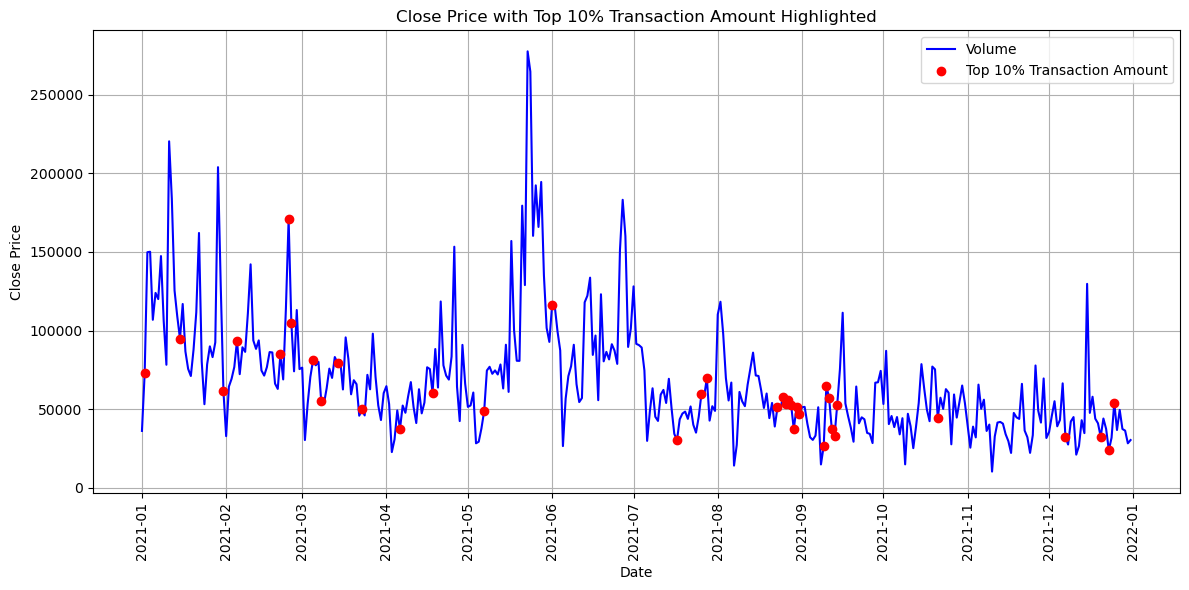

In [324]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 'date' 열을 datetime 형식으로 변환
target_df['date'] = pd.to_datetime(target_df['date'])

# transaction_amount의 상위 10% 기준 계산
threshold = target_df['transaction_amount'].quantile(0.90)

# 상위 10% 조건에 맞는 인덱스 필터링
high_transaction_days = target_df[target_df['transaction_amount'] > threshold]

# 전체 close 데이터 그래프
plt.figure(figsize=(12, 6))
plt.plot(target_df['date'], target_df['volume'], label='Volume', color='blue')  # X축: 'date', Y축: 'close'

# 상위 10% transaction_amount가 발생한 날의 close 값에 점 찍기
plt.scatter(high_transaction_days['date'], high_transaction_days['volume'], color='red', label='Top 10% Transaction Amount', zorder=5)  # X축: 'date', Y축: 'close'

# 날짜 축 포맷 설정 (1달 간격)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 1달 간격으로 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 연-월 형식으로 표시

# 그래프 꾸미기
plt.title('Close Price with Top 10% Transaction Amount Highlighted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=90)  # X축 라벨 회전
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [325]:
target_df[(target_df['transaction_flag'] != 0)]

,date,transaction_count,transaction_amount,transaction_flag,returns,close,abs_returns,volume,open,high,...,daily_avg_dawn_returns,daily_avg_morning_volume,daily_avg_afternoon_volume,daily_avg_night_volume,daily_avg_dawn_volume,daily_morning_volatility,daily_afternoon_volatility,daily_night_volatility,daily_dawn_volatility,daily_volatility
0,2021-01-01,2,9.688319e+13,1,0.013975,29327.84,0.013975,36168.957767,28923.63,29600.00,...,4.323588e-07,0.559473,0.731030,0.520352,0.697628,0.000094,0.000111,0.000099,0.000110,0.000104
1,2021-01-02,4,3.744000e+14,1,0.066923,31290.53,0.066923,72902.222867,29327.83,31567.89,...,4.097032e-07,0.709484,2.586270,2.205785,0.516695,0.000105,0.000244,0.000320,0.000087,0.000213
2,2021-01-03,1,2.040000e+12,1,0.080568,33811.54,0.080568,149782.407229,31290.53,34778.11,...,2.236047e-06,1.627154,1.790353,1.039721,1.142659,0.000223,0.000239,0.000205,0.000181,0.000213
5,2021-01-06,1,5.665082e+12,1,0.057812,34213.46,0.057812,123925.107334,32343.61,35766.58,...,1.414631e-06,1.337260,1.305444,1.664178,1.579192,0.000220,0.000194,0.000247,0.000252,0.000229
7,2021-01-08,1,2.010000e+12,1,0.078117,41454.13,0.078117,147329.799998,38450.51,41785.90,...,-1.696109e-06,1.621553,1.836673,1.482310,1.531221,0.000260,0.000328,0.000320,0.000306,0.000305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,8,1.008189e+13,1,0.024629,48536.66,0.024629,49530.485790,47369.99,49500.00,...,7.336628e-08,0.254562,0.469229,0.350895,0.258287,0.000065,0.000085,0.000077,0.000074,0.000075
361,2021-12-28,2,2.520441e+12,1,-0.052860,45971.01,0.052860,37372.927420,48536.65,48718.59,...,-1.382902e-06,0.447776,0.574707,0.386613,0.713744,0.000107,0.000131,0.000104,0.000126,0.000118
362,2021-12-29,8,1.008175e+13,1,0.022579,47009.02,0.022579,36357.689870,45971.02,47440.10,...,3.468357e-07,0.355661,0.679521,0.472957,0.320512,0.000079,0.000130,0.000131,0.000071,0.000106
363,2021-12-30,5,6.181513e+12,1,0.008172,47393.20,0.008172,28286.992960,47009.03,48300.01,...,2.994568e-07,0.327005,0.390545,0.283874,0.403775,0.000081,0.000088,0.000097,0.000114,0.000096


In [426]:
target_df['target'] = target_df['transaction_amount']
target_df = target_df.drop(['transaction_count', 'transaction_amount', 'transaction_flag'], axis=1)

In [427]:
target_df.set_index('date', inplace=True)
target_df

,returns,close,abs_returns,volume,open,high,low,high_low,daily_avg_trades,daily_sum_trades,...,daily_avg_morning_volume,daily_avg_afternoon_volume,daily_avg_night_volume,daily_avg_dawn_volume,daily_morning_volatility,daily_afternoon_volatility,daily_night_volatility,daily_dawn_volatility,daily_volatility,target
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.013975,29327.84,0.013975,36168.957767,28923.63,29600.00,28690.17,909.83,15.218848,1314878,...,0.559473,0.731030,0.520352,0.697628,0.000094,0.000111,0.000099,0.000110,0.000104,9.688319e+13
2021-01-02,0.066923,31290.53,0.066923,72902.222867,29327.83,31567.89,28624.57,2943.32,25.994468,2245922,...,0.709484,2.586270,2.205785,0.516695,0.000105,0.000244,0.000320,0.000087,0.000213,3.744000e+14
2021-01-03,0.080568,33811.54,0.080568,149782.407229,31290.53,34778.11,30300.00,4478.11,27.427060,2369698,...,1.627154,1.790353,1.039721,1.142659,0.000223,0.000239,0.000205,0.000181,0.000213,2.040000e+12
2021-01-04,-0.050215,32113.68,0.050215,150078.830016,33811.54,33873.45,28130.00,5743.45,30.583426,2642408,...,2.816325,1.839324,0.863119,1.004376,0.000717,0.000281,0.000198,0.000172,0.000407,0.000000e+00
2021-01-05,0.007120,32342.33,0.007120,106816.247165,32113.68,32853.38,29900.00,2953.38,29.245961,2526851,...,1.049916,1.146717,1.583017,1.593034,0.000230,0.000200,0.000231,0.000283,0.000238,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.024629,48536.66,0.024629,49530.485790,47369.99,49500.00,46547.00,2953.00,11.682998,1009411,...,0.254562,0.469229,0.350895,0.258287,0.000065,0.000085,0.000077,0.000074,0.000075,1.008189e+13
2021-12-28,-0.052860,45971.01,0.052860,37372.927420,48536.65,48718.59,45750.00,2968.59,15.576088,1345774,...,0.447776,0.574707,0.386613,0.713744,0.000107,0.000131,0.000104,0.000126,0.000118,2.520441e+12
2021-12-29,0.022579,47009.02,0.022579,36357.689870,45971.02,47440.10,45456.00,1984.10,12.894375,1114074,...,0.355661,0.679521,0.472957,0.320512,0.000079,0.000130,0.000131,0.000071,0.000106,1.008175e+13


In [428]:
# special features 읽어오기
files = glob.glob('special_feature/*.csv')

num_files = len(files)
for i, file in enumerate(files):
    try:
        globals()['special_feature_df'+str(i)] = pd.read_csv(file)
    except:
        print('Error in reading file:', file)
        continue

Error in reading file: special_feature\mempool-state-by-fee-level.csv


In [429]:
for i in range(num_files):
    try:
        globals()['special_feature_df'+str(i)] = globals()['special_feature_df'+str(i)][((globals()['special_feature_df'+str(i)]['timestamp'] >= '2021-01-01 00:00:00') & (globals()['special_feature_df'+str(i)]['timestamp'] < '2022-01-01 00:00:00'))]
    except Exception as e:
        print('Error in processing special feature:', i)
        print(e)
        continue    

Error in processing special feature: 16
'special_feature_df16'


In [430]:
special_features_df = pd.DataFrame()

for i in range(num_files):
    try:
        if len(globals()['special_feature_df'+str(i)]) == len(special_feature_df0):
            globals()['special_feature_df'+str(i)].set_index('timestamp', inplace=True)
            special_features_df = pd.concat([special_features_df, globals()['special_feature_df'+str(i)]], axis=1)
    
    except Exception as e:
        print('Error in processing special feature:', i)
        print(e)
        continue

Error in processing special feature: 16
'special_feature_df16'


In [431]:
special_features_df

,avg-block-size,avg-confirmation-time,blocks-size,cost-per-transaction,difficulty,fees-usd-per-transaction,hash-rate,market-price,median-confirmation-time,miners-revenue,...,n-payments,n-transactions-excluding-popular,n-transactions-per-block,n-transactions-total,n-transactions,n-unique-addresses,output-volume,trade-volume,transaction-fees-usd,transaction-fees
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-02 00:00:00+00:00,1.395637,87.547595,319315.580633,107.041738,1.859959e+13,8.400989,1.396132e+08,29393.75,11.625000,3.190850e+07,...,666559.0,293409.0,1967.622517,601835959.0,297111.0,711719.0,2.164453e+06,4.912580e+08,2.504284e+06,79.699067
2021-01-03 00:00:00+00:00,1.288694,111.085992,319526.405445,100.029960,1.859959e+13,8.057991,1.460853e+08,32195.46,15.083333,3.592236e+07,...,749359.0,355123.0,2272.886076,602133929.0,359116.0,812749.0,2.211805e+06,1.393907e+09,2.893754e+06,86.419994
2021-01-04 00:00:00+00:00,1.318806,85.474696,319729.832857,103.580664,1.859959e+13,9.162334,1.599542e+08,33000.78,12.883333,3.975281e+07,...,799644.0,368932.0,2160.312139,602493027.0,373734.0,851667.0,1.922522e+06,9.758314e+08,3.516375e+06,108.705036
2021-01-05 00:00:00+00:00,1.292713,69.086170,319957.982033,99.733618,1.859959e+13,10.386146,1.451608e+08,32035.03,13.650000,3.531478e+07,...,791183.0,349895.0,2255.356688,602865747.0,354091.0,845343.0,2.209914e+06,1.432013e+09,3.677641e+06,113.365867
2021-01-06 00:00:00+00:00,1.293668,79.048271,320160.890674,108.219166,1.859959e+13,11.266305,1.636526e+08,34046.67,11.775000,4.300457e+07,...,858396.0,393193.0,2245.107345,603220075.0,397384.0,924851.0,2.131443e+06,1.026924e+09,4.477049e+06,128.518985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00+00:00,1.228930,26.788380,382238.913874,190.983398,2.427233e+13,2.678836,1.785745e+08,50801.11,7.433333,4.765952e+07,...,664951.0,248936.0,1686.135135,698069683.0,249548.0,674082.0,3.132094e+06,1.414984e+08,6.684982e+05,13.159126
2021-12-28 00:00:00+00:00,1.470745,50.517992,382420.725061,163.363249,2.427233e+13,3.411168,1.616823e+08,50692.30,9.945833,4.336020e+07,...,700381.0,264818.0,1980.761194,698318287.0,265422.0,729388.0,3.275691e+06,1.936689e+08,9.053991e+05,17.860682
2021-12-29 00:00:00+00:00,1.402008,95.100242,382617.981662,159.081648,2.427233e+13,2.829209,1.749547e+08,47601.26,8.083333,4.391974e+07,...,719499.0,275371.0,1904.020690,698584885.0,276083.0,741024.0,3.496397e+06,3.580691e+08,7.810966e+05,16.409159


In [432]:
special_features_df.index = pd.to_datetime(special_features_df.index).date

In [433]:
special_features_df.index = special_features_df.index.astype(str)
special_features_df

,avg-block-size,avg-confirmation-time,blocks-size,cost-per-transaction,difficulty,fees-usd-per-transaction,hash-rate,market-price,median-confirmation-time,miners-revenue,...,n-payments,n-transactions-excluding-popular,n-transactions-per-block,n-transactions-total,n-transactions,n-unique-addresses,output-volume,trade-volume,transaction-fees-usd,transaction-fees
2021-01-02,1.395637,87.547595,319315.580633,107.041738,1.859959e+13,8.400989,1.396132e+08,29393.75,11.625000,3.190850e+07,...,666559.0,293409.0,1967.622517,601835959.0,297111.0,711719.0,2.164453e+06,4.912580e+08,2.504284e+06,79.699067
2021-01-03,1.288694,111.085992,319526.405445,100.029960,1.859959e+13,8.057991,1.460853e+08,32195.46,15.083333,3.592236e+07,...,749359.0,355123.0,2272.886076,602133929.0,359116.0,812749.0,2.211805e+06,1.393907e+09,2.893754e+06,86.419994
2021-01-04,1.318806,85.474696,319729.832857,103.580664,1.859959e+13,9.162334,1.599542e+08,33000.78,12.883333,3.975281e+07,...,799644.0,368932.0,2160.312139,602493027.0,373734.0,851667.0,1.922522e+06,9.758314e+08,3.516375e+06,108.705036
2021-01-05,1.292713,69.086170,319957.982033,99.733618,1.859959e+13,10.386146,1.451608e+08,32035.03,13.650000,3.531478e+07,...,791183.0,349895.0,2255.356688,602865747.0,354091.0,845343.0,2.209914e+06,1.432013e+09,3.677641e+06,113.365867
2021-01-06,1.293668,79.048271,320160.890674,108.219166,1.859959e+13,11.266305,1.636526e+08,34046.67,11.775000,4.300457e+07,...,858396.0,393193.0,2245.107345,603220075.0,397384.0,924851.0,2.131443e+06,1.026924e+09,4.477049e+06,128.518985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1.228930,26.788380,382238.913874,190.983398,2.427233e+13,2.678836,1.785745e+08,50801.11,7.433333,4.765952e+07,...,664951.0,248936.0,1686.135135,698069683.0,249548.0,674082.0,3.132094e+06,1.414984e+08,6.684982e+05,13.159126
2021-12-28,1.470745,50.517992,382420.725061,163.363249,2.427233e+13,3.411168,1.616823e+08,50692.30,9.945833,4.336020e+07,...,700381.0,264818.0,1980.761194,698318287.0,265422.0,729388.0,3.275691e+06,1.936689e+08,9.053991e+05,17.860682
2021-12-29,1.402008,95.100242,382617.981662,159.081648,2.427233e+13,2.829209,1.749547e+08,47601.26,8.083333,4.391974e+07,...,719499.0,275371.0,1904.020690,698584885.0,276083.0,741024.0,3.496397e+06,3.580691e+08,7.810966e+05,16.409159
2021-12-30,1.440240,34.964226,382821.242930,144.215806,2.427233e+13,3.343811,1.435835e+08,46408.87,9.000000,3.533590e+07,...,674389.0,244381.0,2059.000000,698861383.0,245021.0,679386.0,3.153504e+06,2.653706e+08,8.193040e+05,17.654039


In [434]:
target_df = pd.concat([target_df, special_features_df], axis=1)
target_df

,returns,close,abs_returns,volume,open,high,low,high_low,daily_avg_trades,daily_sum_trades,...,n-payments,n-transactions-excluding-popular,n-transactions-per-block,n-transactions-total,n-transactions,n-unique-addresses,output-volume,trade-volume,transaction-fees-usd,transaction-fees
2021-01-01,0.013975,29327.84,0.013975,36168.957767,28923.63,29600.00,28690.17,909.83,15.218848,1314878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.066923,31290.53,0.066923,72902.222867,29327.83,31567.89,28624.57,2943.32,25.994468,2245922,...,666559.0,293409.0,1967.622517,601835959.0,297111.0,711719.0,2.164453e+06,4.912580e+08,2.504284e+06,79.699067
2021-01-03,0.080568,33811.54,0.080568,149782.407229,31290.53,34778.11,30300.00,4478.11,27.427060,2369698,...,749359.0,355123.0,2272.886076,602133929.0,359116.0,812749.0,2.211805e+06,1.393907e+09,2.893754e+06,86.419994
2021-01-04,-0.050215,32113.68,0.050215,150078.830016,33811.54,33873.45,28130.00,5743.45,30.583426,2642408,...,799644.0,368932.0,2160.312139,602493027.0,373734.0,851667.0,1.922522e+06,9.758314e+08,3.516375e+06,108.705036
2021-01-05,0.007120,32342.33,0.007120,106816.247165,32113.68,32853.38,29900.00,2953.38,29.245961,2526851,...,791183.0,349895.0,2255.356688,602865747.0,354091.0,845343.0,2.209914e+06,1.432013e+09,3.677641e+06,113.365867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.024629,48536.66,0.024629,49530.485790,47369.99,49500.00,46547.00,2953.00,11.682998,1009411,...,664951.0,248936.0,1686.135135,698069683.0,249548.0,674082.0,3.132094e+06,1.414984e+08,6.684982e+05,13.159126
2021-12-28,-0.052860,45971.01,0.052860,37372.927420,48536.65,48718.59,45750.00,2968.59,15.576088,1345774,...,700381.0,264818.0,1980.761194,698318287.0,265422.0,729388.0,3.275691e+06,1.936689e+08,9.053991e+05,17.860682
2021-12-29,0.022579,47009.02,0.022579,36357.689870,45971.02,47440.10,45456.00,1984.10,12.894375,1114074,...,719499.0,275371.0,1904.020690,698584885.0,276083.0,741024.0,3.496397e+06,3.580691e+08,7.810966e+05,16.409159
2021-12-30,0.008172,47393.20,0.008172,28286.992960,47009.03,48300.01,46325.61,1974.40,10.534225,910157,...,674389.0,244381.0,2059.000000,698861383.0,245021.0,679386.0,3.153504e+06,2.653706e+08,8.193040e+05,17.654039


In [435]:
# target_df.to_csv('test/test_set_1208.csv', index=True)

In [484]:
qqqqqq = pd.read_csv('test/preprocessed/test_dataset_2018_241219.csv')
qqqqqq

,Unnamed: 0,transaction_count,transaction_amount,transaction_flag,returns,close,abs_returns,volume,open,high,...,n-payments,n-transactions-excluding-popular,n-transactions-per-block,n-transactions-total,n-transactions,n-unique-addresses,output-volume,trade-volume,transaction-fees-usd,transaction-fees
0,2018-01-01,1.0,1.362702e+14,1.0,NaN,13380.00,NaN,8609.915844,13716.36,13818.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,0.0,0.000000e+00,0.0,0.096794,14675.11,0.096794,20078.092111,13382.16,15473.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,0.0,0.000000e+00,0.0,0.016654,14919.51,0.016654,15905.667639,14675.11,15307.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,2.0,1.030237e+13,1.0,0.009386,15059.54,0.009386,21329.649574,14919.51,15280.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,4.0,3.674793e+13,1.0,0.126222,16960.39,0.126222,23251.491125,15059.54,17176.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,664951.0,248936.0,1686.135135,698069683.0,249548.0,674082.0,3.132094e+06,1.414984e+08,668498.228258,13.159126
725,2021-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,700381.0,264818.0,1980.761194,698318287.0,265422.0,729388.0,3.275691e+06,1.936689e+08,905399.059273,17.860682
726,2021-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,719499.0,275371.0,1904.020690,698584885.0,276083.0,741024.0,3.496397e+06,3.580691e+08,781096.623948,16.409159
727,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,674389.0,244381.0,2059.000000,698861383.0,245021.0,679386.0,3.153504e+06,2.653706e+08,819304.012992,17.654039


## Shifted

In [456]:
shifted_columns = target_df.columns.difference(['target'])
shifted_df = target_df[shifted_columns].shift(1)
second_shifted_df = target_df[shifted_columns].shift(2)
third_shifted_df = target_df[shifted_columns].shift(3)
fourth_shifted_df = target_df[shifted_columns].shift(4)
fifth_shifted_df = target_df[shifted_columns].shift(5)

shifted_columns = shifted_df.columns + '_shifted'
shifted_df.columns = shifted_columns
second_shifted_df.columns = shifted_columns + '_2'
third_shifted_df.columns = shifted_columns + '_3'
fourth_shifted_df.columns = shifted_columns + '_4'
fifth_shifted_df.columns = shifted_columns + '_5'

combined_df = pd.concat([shifted_df, second_shifted_df, third_shifted_df, fourth_shifted_df, fifth_shifted_df], axis=1)

combined_df = shifted_df


# shifted_columns = target_df.columns.difference(['target'])
# shifted_df = target_df[shifted_columns].shift(1)
# shifted_columns = shifted_df.columns + '_shifted'
# shifted_df.columns = shifted_columns

# combined_df = pd.concat([target_df.drop(['target'], axis=1), shifted_df], axis=1)

# second_shifted_df = target_df[shifted_columns].shift(2)
# third_shifted_df = target_df[shifted_columns].shift(3)
# fourth_shifted_df = target_df[shifted_columns].shift(4)
# fifth_shifted_df = target_df[shifted_columns].shift(5)

# shifted_columns = shifted_df.columns + '_shifted'
# shifted_df.columns = shifted_columns
# second_shifted_df.columns = shifted_columns + '_2'
# third_shifted_df.columns = shifted_columns + '_3'
# fourth_shifted_df.columns = shifted_columns + '_4'
# fifth_shifted_df.columns = shifted_columns + '_5'

# combined_df = pd.concat([target_df.drop(['target'], axis=1), shifted_df, second_shifted_df, third_shifted_df, fourth_shifted_df, fifth_shifted_df], axis=1)


In [457]:
combined_df

,abs_returns_shifted,avg-block-size_shifted,avg-confirmation-time_shifted,blocks-size_shifted,close_shifted,cost-per-transaction_shifted,daily_afternoon_returns_shifted,daily_afternoon_volatility_shifted,daily_avg_afternoon_returns_shifted,daily_avg_afternoon_volume_shifted,...,n-transactions-per-block_shifted,n-transactions-total_shifted,n-unique-addresses_shifted,open_shifted,output-volume_shifted,returns_shifted,trade-volume_shifted,transaction-fees_shifted,transaction-fees-usd_shifted,volume_shifted
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.013975,NaN,NaN,NaN,29327.84,NaN,-0.007978,0.000111,-3.646507e-07,0.731030,...,NaN,NaN,NaN,28923.63,NaN,0.013975,NaN,NaN,NaN,36168.957767
2021-01-03,0.066923,1.395637,87.547595,319315.580633,31290.53,107.041738,0.104250,0.000244,4.620890e-06,2.586270,...,1967.622517,601835959.0,711719.0,29327.83,2.164453e+06,0.066923,4.912580e+08,79.699067,2.504284e+06,72902.222867
2021-01-04,0.080568,1.288694,111.085992,319526.405445,33811.54,100.029960,-0.043711,0.000239,-2.040671e-06,1.790353,...,2272.886076,602133929.0,812749.0,31290.53,2.211805e+06,0.080568,1.393907e+09,86.419994,2.893754e+06,149782.407229
2021-01-05,0.050215,1.318806,85.474696,319729.832857,32113.68,103.580664,0.009144,0.000281,4.608122e-07,1.839324,...,2160.312139,602493027.0,851667.0,33811.54,1.922522e+06,-0.050215,9.758314e+08,108.705036,3.516375e+06,150078.830016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.001863,0.984266,14.511513,382106.846865,47370.00,214.835235,0.010177,0.000068,4.710503e-07,0.210375,...,1481.895522,697869915.0,574433.0,47281.93,2.463063e+06,0.001863,1.231949e+08,7.753410,3.913215e+05,36753.750280
2021-12-28,0.024629,1.228930,26.788380,382238.913874,48536.66,190.983398,0.021546,0.000085,9.905213e-07,0.469229,...,1686.135135,698069683.0,674082.0,47369.99,3.132094e+06,0.024629,1.414984e+08,13.159126,6.684982e+05,49530.485790
2021-12-29,0.052860,1.470745,50.517992,382420.725061,45971.01,163.363249,-0.023779,0.000131,-1.105576e-06,0.574707,...,1980.761194,698318287.0,729388.0,48536.65,3.275691e+06,-0.052860,1.936689e+08,17.860682,9.053991e+05,37372.927420
2021-12-30,0.022579,1.402008,95.100242,382617.981662,47009.02,159.081648,-0.003834,0.000130,-1.694046e-07,0.679521,...,1904.020690,698584885.0,741024.0,45971.02,3.496397e+06,0.022579,3.580691e+08,16.409159,7.810966e+05,36357.689870


In [458]:
combined_df = combined_df.dropna()

In [459]:
# combined_df.to_csv('test/test_set_1208_shifted_combined.csv', index=True)

In [460]:
# shifted_df['target'] = target_df['target']
# shifted_df = shifted_df.dropna()

In [461]:
# shifted_df.to_csv('test/test_set_1208_shifted.csv', index=False)

In [462]:
# # shifted_df = copy.deepcopy(target_df)
shifted_df = copy.deepcopy(combined_df)
shifted_df['target'] = target_df['target']


In [464]:
shifted_df

,abs_returns_shifted,avg-block-size_shifted,avg-confirmation-time_shifted,blocks-size_shifted,close_shifted,cost-per-transaction_shifted,daily_afternoon_returns_shifted,daily_afternoon_volatility_shifted,daily_avg_afternoon_returns_shifted,daily_avg_afternoon_volume_shifted,...,n-transactions-total_shifted,n-unique-addresses_shifted,open_shifted,output-volume_shifted,returns_shifted,trade-volume_shifted,transaction-fees_shifted,transaction-fees-usd_shifted,volume_shifted,target
2021-01-03,0.066923,1.395637,87.547595,319315.580633,31290.53,107.041738,0.104250,0.000244,4.620890e-06,2.586270,...,601835959.0,711719.0,29327.83,2.164453e+06,0.066923,4.912580e+08,79.699067,2.504284e+06,72902.222867,2.040000e+12
2021-01-04,0.080568,1.288694,111.085992,319526.405445,33811.54,100.029960,-0.043711,0.000239,-2.040671e-06,1.790353,...,602133929.0,812749.0,31290.53,2.211805e+06,0.080568,1.393907e+09,86.419994,2.893754e+06,149782.407229,0.000000e+00
2021-01-05,0.050215,1.318806,85.474696,319729.832857,32113.68,103.580664,0.009144,0.000281,4.608122e-07,1.839324,...,602493027.0,851667.0,33811.54,1.922522e+06,-0.050215,9.758314e+08,108.705036,3.516375e+06,150078.830016,0.000000e+00
2021-01-06,0.007120,1.292713,69.086170,319957.982033,32342.33,99.733618,0.030402,0.000200,1.406496e-06,1.146717,...,602865747.0,845343.0,32113.68,2.209914e+06,0.007120,1.432013e+09,113.365867,3.677641e+06,106816.247165,5.665082e+12
2021-01-07,0.057812,1.293668,79.048271,320160.890674,34213.46,108.219166,-0.000573,0.000194,-7.763899e-09,1.305444,...,603220075.0,924851.0,32343.61,2.131443e+06,0.057812,1.026924e+09,128.518985,4.477049e+06,123925.107334,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.001863,0.984266,14.511513,382106.846865,47370.00,214.835235,0.010177,0.000068,4.710503e-07,0.210375,...,697869915.0,574433.0,47281.93,2.463063e+06,0.001863,1.231949e+08,7.753410,3.913215e+05,36753.750280,1.008189e+13
2021-12-28,0.024629,1.228930,26.788380,382238.913874,48536.66,190.983398,0.021546,0.000085,9.905213e-07,0.469229,...,698069683.0,674082.0,47369.99,3.132094e+06,0.024629,1.414984e+08,13.159126,6.684982e+05,49530.485790,2.520441e+12
2021-12-29,0.052860,1.470745,50.517992,382420.725061,45971.01,163.363249,-0.023779,0.000131,-1.105576e-06,0.574707,...,698318287.0,729388.0,48536.65,3.275691e+06,-0.052860,1.936689e+08,17.860682,9.053991e+05,37372.927420,1.008175e+13
2021-12-30,0.022579,1.402008,95.100242,382617.981662,47009.02,159.081648,-0.003834,0.000130,-1.694046e-07,0.679521,...,698584885.0,741024.0,45971.02,3.496397e+06,0.022579,3.580691e+08,16.409159,7.810966e+05,36357.689870,6.181513e+12


In [465]:
shifted_df = shifted_df.dropna()

In [466]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [467]:
target_df

,returns,close,abs_returns,volume,open,high,low,high_low,daily_avg_trades,daily_sum_trades,...,n-payments,n-transactions-excluding-popular,n-transactions-per-block,n-transactions-total,n-transactions,n-unique-addresses,output-volume,trade-volume,transaction-fees-usd,transaction-fees
2021-01-01,0.013975,29327.84,0.013975,36168.957767,28923.63,29600.00,28690.17,909.83,15.218848,1314878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.066923,31290.53,0.066923,72902.222867,29327.83,31567.89,28624.57,2943.32,25.994468,2245922,...,666559.0,293409.0,1967.622517,601835959.0,297111.0,711719.0,2.164453e+06,4.912580e+08,2.504284e+06,79.699067
2021-01-03,0.080568,33811.54,0.080568,149782.407229,31290.53,34778.11,30300.00,4478.11,27.427060,2369698,...,749359.0,355123.0,2272.886076,602133929.0,359116.0,812749.0,2.211805e+06,1.393907e+09,2.893754e+06,86.419994
2021-01-04,-0.050215,32113.68,0.050215,150078.830016,33811.54,33873.45,28130.00,5743.45,30.583426,2642408,...,799644.0,368932.0,2160.312139,602493027.0,373734.0,851667.0,1.922522e+06,9.758314e+08,3.516375e+06,108.705036
2021-01-05,0.007120,32342.33,0.007120,106816.247165,32113.68,32853.38,29900.00,2953.38,29.245961,2526851,...,791183.0,349895.0,2255.356688,602865747.0,354091.0,845343.0,2.209914e+06,1.432013e+09,3.677641e+06,113.365867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.024629,48536.66,0.024629,49530.485790,47369.99,49500.00,46547.00,2953.00,11.682998,1009411,...,664951.0,248936.0,1686.135135,698069683.0,249548.0,674082.0,3.132094e+06,1.414984e+08,6.684982e+05,13.159126
2021-12-28,-0.052860,45971.01,0.052860,37372.927420,48536.65,48718.59,45750.00,2968.59,15.576088,1345774,...,700381.0,264818.0,1980.761194,698318287.0,265422.0,729388.0,3.275691e+06,1.936689e+08,9.053991e+05,17.860682
2021-12-29,0.022579,47009.02,0.022579,36357.689870,45971.02,47440.10,45456.00,1984.10,12.894375,1114074,...,719499.0,275371.0,1904.020690,698584885.0,276083.0,741024.0,3.496397e+06,3.580691e+08,7.810966e+05,16.409159
2021-12-30,0.008172,47393.20,0.008172,28286.992960,47009.03,48300.01,46325.61,1974.40,10.534225,910157,...,674389.0,244381.0,2059.000000,698861383.0,245021.0,679386.0,3.153504e+06,2.653706e+08,8.193040e+05,17.654039


In [468]:
# test_target_df = pd.read_csv('test/test_price_1208_21_day_with_target.csv')

In [469]:
# test_target_df

In [470]:
# shifted_df = pd.concat([shifted_df, test_target_df['trade_per_volume', 'trade_per_volume_flag']], axis=1)
# shifted_df

In [471]:
# 스케일링

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(shifted_df), columns=shifted_df.columns)
scaled_df

,abs_returns_shifted,avg-block-size_shifted,avg-confirmation-time_shifted,blocks-size_shifted,close_shifted,cost-per-transaction_shifted,daily_afternoon_returns_shifted,daily_afternoon_volatility_shifted,daily_avg_afternoon_returns_shifted,daily_avg_afternoon_volume_shifted,...,n-transactions-total_shifted,n-unique-addresses_shifted,open_shifted,output-volume_shifted,returns_shifted,trade-volume_shifted,transaction-fees_shifted,transaction-fees-usd_shifted,volume_shifted,target
0,0.406849,0.843434,0.023892,0.000000,0.044251,0.066924,1.000000,0.135431,1.000000,0.325268,...,0.000000,0.580208,0.000000,0.123313,0.695586,0.121012,0.247754,0.131491,0.234268,0.000462
1,0.489988,0.700504,0.030871,0.003320,0.109210,0.033072,0.245974,0.131462,0.252810,0.216304,...,0.003071,0.756423,0.050255,0.127487,0.738254,0.414737,0.270515,0.154983,0.522001,0.000000
2,0.305051,0.740749,0.023277,0.006523,0.065461,0.050214,0.515329,0.162686,0.533388,0.223008,...,0.006772,0.824303,0.114805,0.101991,0.329294,0.278694,0.345984,0.192538,0.523110,0.000000
3,0.042472,0.705876,0.018418,0.010116,0.071353,0.031641,0.623662,0.102195,0.639460,0.128188,...,0.010614,0.813273,0.071332,0.127320,0.508582,0.427137,0.361768,0.202265,0.361195,0.001283
4,0.351338,0.707152,0.021372,0.013311,0.119566,0.072608,0.465811,0.097645,0.480830,0.149918,...,0.014265,0.951949,0.077219,0.120404,0.667097,0.295320,0.413084,0.250484,0.425227,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.010439,0.293636,0.002238,0.988751,0.458569,0.587337,0.520593,0.003323,0.534536,0.000000,...,0.989781,0.340756,0.459715,0.149631,0.492142,0.001243,0.004109,0.004040,0.098978,0.002283
359,0.149153,0.620630,0.005878,0.990830,0.488630,0.472183,0.578531,0.016433,0.592802,0.035438,...,0.991840,0.514562,0.461970,0.208595,0.563333,0.007199,0.022415,0.020759,0.146796,0.000571
360,0.321164,0.943816,0.012913,0.993693,0.422521,0.338837,0.347549,0.050961,0.357695,0.049878,...,0.994403,0.611026,0.491842,0.221251,0.321024,0.024175,0.038337,0.035049,0.101295,0.002283
361,0.136666,0.851948,0.026131,0.996799,0.449268,0.318166,0.449192,0.049951,0.462700,0.064228,...,0.997150,0.631321,0.426149,0.240703,0.556924,0.077672,0.033422,0.027551,0.097495,0.001400


In [472]:
y = scaled_df['target'].values
X = scaled_df.drop('target', axis=1)

In [473]:
# y = test_target_df['target'].values
# X = test_target_df.drop('target', axis=1)


In [474]:
## train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [475]:
# shift 1, Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print('훈련 세트 결정 계수 :', lr.score(X_train, y_train))

# 테스트 셋 예측
lr_y_pred = lr.predict(X_test)

# 정확도
predict_df = pd.DataFrame({'y_test': y_test, 'y_pred': lr_y_pred})
predict_df['diff'] = predict_df['y_test'] - predict_df['y_pred']
predict_df['diff_abs'] = predict_df['diff'].abs()
predict_df['diff_squared'] = predict_df['diff']**2
print("MAE:", predict_df['diff_abs'].mean())
print("MSE:", predict_df['diff_squared'].mean())
print("R2:", lr.score(X_test, y_test))

훈련 세트 결정 계수 : 0.13433276670712135
MAE: 0.0989960813992507
MSE: 0.01113991252184889
R2: -22.23320792440394


In [476]:
XGBR = XGBRegressor(n_estimators=100000, learning_rate=0.01, max_depth=2, min_child_weight=1, objective='reg:squarederror')
XGBR.fit(X_train, y_train)

predict_df = pd.DataFrame({'y_test': y_test, 'y_pred': XGBR.predict(X_test)})
predict_df['diff'] = predict_df['y_test'] - predict_df['y_pred']
predict_df['diff_abs'] = predict_df['diff'].abs()
predict_df['diff_squared'] = predict_df['diff']**2
print("MAE:", predict_df['diff_abs'].mean())
print("MSE:", predict_df['diff_squared'].mean())
print("R2:", XGBR.score(X_test, y_test))

MAE: 0.13394886953359736
MSE: 0.03511529241679743
R2: -72.23584349927144


In [358]:
xxx = XGBR.predict(X)

X['ITI'] = xxx

In [359]:
test_target_df = copy.deepcopy(target_df)
test_target_df = test_target_df.iloc[5:]
test_target_df['ITI'] = xxx

test_target_df

,returns,close,abs_returns,volume,open,high,low,high_low,daily_avg_trades,daily_sum_trades,...,daily_avg_afternoon_volume,daily_avg_night_volume,daily_avg_dawn_volume,daily_morning_volatility,daily_afternoon_volatility,daily_night_volatility,daily_dawn_volatility,daily_volatility,target,ITI
date,,,,,,,,,,,,,,,,,,,,,
2021-01-06,0.057812,34213.46,0.057812,123925.107334,32343.61,35766.58,31763.23,4003.35,29.997488,2591783,...,1.305444,1.664178,1.579192,0.000220,0.000194,0.000247,0.000252,0.000229,5.665082e+12,0.001676
2021-01-07,0.123939,38453.97,0.123939,119985.413321,34213.58,38644.76,34150.00,4494.76,32.577384,2814686,...,1.646021,2.040753,1.300917,0.000158,0.000191,0.000641,0.000213,0.000360,0.000000e+00,0.000005
2021-01-08,0.078117,41454.13,0.078117,147329.799998,38450.51,41785.90,36500.00,5285.90,33.861481,2925632,...,1.836673,1.482310,1.531221,0.000260,0.000328,0.000320,0.000306,0.000305,2.010000e+12,0.000526
2021-01-09,-0.015321,40819.01,0.015321,106157.363291,41454.13,41950.00,38652.00,3298.00,23.126806,1998156,...,0.922723,0.692896,0.873951,0.000224,0.000178,0.000146,0.000244,0.000202,0.000000e+00,0.000264
2021-01-10,-0.033990,39431.59,0.033990,78228.490396,40819.01,41350.00,38450.00,2900.00,30.417245,2628050,...,1.524648,2.104470,0.771246,0.000203,0.000267,0.000404,0.000163,0.000275,0.000000e+00,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.024629,48536.66,0.024629,49530.485790,47369.99,49500.00,46547.00,2953.00,11.682998,1009411,...,0.469229,0.350895,0.258287,0.000065,0.000085,0.000077,0.000074,0.000075,1.008189e+13,0.150004
2021-12-28,-0.052860,45971.01,0.052860,37372.927420,48536.65,48718.59,45750.00,2968.59,15.576088,1345774,...,0.574707,0.386613,0.713744,0.000107,0.000131,0.000104,0.000126,0.000118,2.520441e+12,0.130290
2021-12-29,0.022579,47009.02,0.022579,36357.689870,45971.02,47440.10,45456.00,1984.10,12.894375,1114074,...,0.679521,0.472957,0.320512,0.000079,0.000130,0.000131,0.000071,0.000106,1.008175e+13,0.080916


In [367]:
test_target_df_shifted = copy.deepcopy(test_target_df)

shifted_columns = test_target_df.columns.difference(['returns', 'open', 'close'])

test_shifted_df = test_target_df[shifted_columns]

shifted_columns = test_shifted_df.columns + '_shifted'
test_shifted_df.columns = shifted_columns

test_shifted_df = test_shifted_df.dropna()

test_shifted_df

,ITI_shifted,abs_returns_shifted,daily_afternoon_returns_shifted,daily_afternoon_volatility_shifted,daily_avg_afternoon_returns_shifted,daily_avg_afternoon_volume_shifted,daily_avg_dawn_returns_shifted,daily_avg_dawn_volume_shifted,daily_avg_morning_returns_shifted,daily_avg_morning_volume_shifted,...,daily_sum_taker_buy_base_asset_volume_shifted,daily_sum_taker_buy_quote_asset_volume_shifted,daily_sum_trades_shifted,daily_volatility_shifted,daily_vwap_shifted,high_shifted,high_low_shifted,low_shifted,target_shifted,volume_shifted
date,,,,,,,,,,,,,,,,,,,,,
2021-01-06,0.001676,0.057812,-0.000573,0.000194,-7.763899e-09,1.305444,1.414631e-06,1.579192,-5.582466e-08,1.337260,...,63052.914652,2.199632e+09,2591783,0.000229,34859.916813,35766.58,4003.35,31763.23,5.665082e+12,123925.107334
2021-01-07,0.000005,0.123939,0.050522,0.000191,2.300068e-06,1.646021,7.446656e-07,1.300917,5.974068e-07,1.161648,...,65055.107136,2.482583e+09,2814686,0.000360,38115.130080,38644.76,4494.76,34150.00,0.000000e+00,119985.413321
2021-01-08,0.000526,0.078117,-0.006724,0.000328,-2.586093e-07,1.836673,-1.696109e-06,1.531221,3.904481e-06,1.621553,...,67300.155216,2.684975e+09,2925632,0.000305,39835.033803,41785.90,5285.90,36500.00,2.010000e+12,147329.799998
2021-01-09,0.000264,0.015321,-0.003559,0.000178,-1.492381e-07,0.922723,-1.462739e-06,0.873951,1.498248e-06,1.019039,...,37007.321909,1.491991e+09,1998156,0.000202,40307.944696,41950.00,3298.00,38652.00,0.000000e+00,106157.363291
2021-01-10,0.000003,0.033990,-0.015566,0.000267,-6.907839e-07,1.524648,4.313494e-07,0.771246,-1.456229e-06,1.072299,...,55451.344673,2.160977e+09,2628050,0.000275,38948.079534,41350.00,2900.00,38450.00,0.000000e+00,78228.490396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.150004,0.024629,0.021546,0.000085,9.905213e-07,0.469229,7.336628e-08,0.258287,-8.317135e-08,0.254562,...,14436.093220,7.383692e+08,1009411,0.000075,51127.215752,49500.00,2953.00,46547.00,1.008189e+13,49530.485790
2021-12-28,0.130290,0.052860,-0.023779,0.000131,-1.105576e-06,0.574707,-1.382902e-06,0.713744,5.213535e-09,0.447776,...,21743.170130,1.063172e+09,1345774,0.000118,48896.213338,48718.59,2968.59,45750.00,2.520441e+12,37372.927420
2021-12-29,0.080916,0.022579,-0.003834,0.000130,-1.694046e-07,0.679521,3.468357e-07,0.320512,-1.524654e-07,0.355661,...,19089.619100,9.059697e+08,1114074,0.000106,47438.398048,47440.10,1984.10,45456.00,1.008175e+13,36357.689870


In [368]:
# 스케일링

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(test_shifted_df), columns=test_shifted_df.columns)
scaled_df.index = test_shifted_df.index

In [369]:
scaled_df

,ITI_shifted,abs_returns_shifted,daily_afternoon_returns_shifted,daily_afternoon_volatility_shifted,daily_avg_afternoon_returns_shifted,daily_avg_afternoon_volume_shifted,daily_avg_dawn_returns_shifted,daily_avg_dawn_volume_shifted,daily_avg_morning_returns_shifted,daily_avg_morning_volume_shifted,...,daily_sum_taker_buy_base_asset_volume_shifted,daily_sum_taker_buy_quote_asset_volume_shifted,daily_sum_trades_shifted,daily_volatility_shifted,daily_vwap_shifted,high_shifted,high_low_shifted,low_shifted,target_shifted,volume_shifted
date,,,,,,,,,,,,,,,,,,,,,
2021-01-06,0.006926,0.351338,0.494844,0.097645,0.504829,0.149918,0.718201,0.485525,0.376333,0.293031,...,0.335503,0.287089,0.328685,0.219866,0.133334,0.123982,0.235024,0.079773,0.001283,0.425227
2021-01-07,0.005263,0.754247,0.771456,0.095695,0.776605,0.196545,0.647271,0.389807,0.449924,0.248260,...,0.348148,0.334999,0.368703,0.398898,0.219783,0.199850,0.271353,0.144136,0.000000,0.410482
2021-01-08,0.005781,0.475053,0.461546,0.197876,0.475289,0.222645,0.388865,0.469025,0.822490,0.365510,...,0.362326,0.369268,0.388621,0.323264,0.265459,0.282649,0.329841,0.207507,0.000455,0.512822
2021-01-09,0.005520,0.092440,0.478679,0.085757,0.488169,0.097523,0.413572,0.242944,0.551410,0.211902,...,0.171015,0.167271,0.222111,0.182153,0.278018,0.286974,0.182878,0.265539,0.000000,0.358729
2021-01-10,0.005260,0.206187,0.413676,0.152078,0.424395,0.179928,0.614100,0.207617,0.218568,0.225481,...,0.287496,0.280544,0.335196,0.282462,0.241904,0.271159,0.153455,0.260092,0.000000,0.254202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.154635,0.149153,0.614589,0.016433,0.622390,0.035438,0.576200,0.031175,0.373253,0.017002,...,0.028469,0.039666,0.044601,0.009206,0.565348,0.485989,0.157373,0.478440,0.002283,0.146796
2021-12-28,0.135003,0.321164,0.369210,0.050961,0.375548,0.049878,0.422025,0.187838,0.383210,0.066261,...,0.074616,0.094662,0.104989,0.067066,0.506099,0.465391,0.158526,0.456948,0.000571,0.101295
2021-12-29,0.085835,0.136666,0.477188,0.049951,0.485794,0.064228,0.605153,0.052579,0.365446,0.042777,...,0.057857,0.068045,0.063391,0.051527,0.467383,0.431691,0.085744,0.449020,0.002283,0.097495


In [370]:
scaled_df['target'] = test_target_df['target']

In [371]:
y = scaled_df['target'].values
X = scaled_df.drop('target', axis=1)

In [373]:
## train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)

In [374]:
import statsmodels.api as sm

In [375]:
# # shift 1, Linear Regression, ITI 추가 이후 결과
# lr = LinearRegression(fit_intercept=True)
# lr.fit(X_train, y_train)
# print('훈련 세트 결정 계수 :', lr.score(X_train, y_train))

# # 테스트 셋 예측
# lr_y_pred = lr.predict(X_test)

# # 정확도
# predict_df = pd.DataFrame({'y_test': y_test, 'y_pred': lr_y_pred})
# predict_df['diff'] = predict_df['y_test'] - predict_df['y_pred']
# predict_df['diff_abs'] = predict_df['diff'].abs()
# predict_df['diff_squared'] = predict_df['diff']**2
# print("MAE:", predict_df['diff_abs'].mean())
# print("MSE:", predict_df['diff_squared'].mean())
# print("R2:", lr.score(X_test, y_test))

lr = sm.OLS(y_train, X_train).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.110e+28
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:22:46   Log-Likelihood:                -631.00
No. Observations:                 252   AIC:                             1334.
Df Residuals:                     216   BIC:                             1461.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [378]:
lr.predict(X_test)

predict_df = pd.DataFrame({'y_test': y_test, 'y_pred': lr.predict(X_test)})

predict_df['diff'] = predict_df['y_test'] - predict_df['y_pred']
predict_df['diff_abs'] = predict_df['diff'].abs()
predict_df['diff_squared'] = predict_df['diff']**2
print("MAE:", predict_df['diff_abs'].mean())
print("MSE:", predict_df['diff_squared'].mean())
print("R2:", lr.rsquared)

MAE: 2.743947337722562
MSE: 10.405542733646573
R2: 1.0


In [164]:
predict_df['y_pred_class'] = predict_df['y_pred'].apply(lambda x: 1 if x >= 0.5 else 0)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict_df['y_pred_class'].values)
accuracy

0.4351851851851852

In [109]:
X

,abs_returns_shifted,close_shifted,daily_afternoon_returns_shifted,daily_afternoon_volatility_shifted,daily_avg_afternoon_returns_shifted,daily_avg_afternoon_volume_shifted,daily_avg_dawn_returns_shifted,daily_avg_dawn_volume_shifted,daily_avg_morning_returns_shifted,daily_avg_morning_volume_shifted,daily_avg_night_returns_shifted,daily_avg_night_volume_shifted,daily_avg_price_shifted,daily_avg_quote_asset_volume_shifted,daily_avg_spread_shifted,daily_avg_trades_shifted,daily_avg_volume_shifted,daily_dawn_returns_shifted,daily_dawn_volatility_shifted,daily_high_shifted,daily_low_shifted,daily_morning_returns_shifted,daily_morning_volatility_shifted,daily_night_returns_shifted,daily_night_volatility_shifted,daily_quote_asset_volume_shifted,daily_sum_taker_buy_base_asset_volume_shifted,daily_sum_taker_buy_quote_asset_volume_shifted,daily_sum_trades_shifted,daily_volatility_shifted,daily_vwap_shifted,high_shifted,high_low_shifted,low_shifted,open_shifted,returns_shifted,transaction_count_shifted,volume_shifted,abs_returns_shifted_2,close_shifted_2,...,transaction_count_shifted_4,volume_shifted_4,abs_returns_shifted_5,close_shifted_5,daily_afternoon_returns_shifted_5,daily_afternoon_volatility_shifted_5,daily_avg_afternoon_returns_shifted_5,daily_avg_afternoon_volume_shifted_5,daily_avg_dawn_returns_shifted_5,daily_avg_dawn_volume_shifted_5,daily_avg_morning_returns_shifted_5,daily_avg_morning_volume_shifted_5,daily_avg_night_returns_shifted_5,daily_avg_night_volume_shifted_5,daily_avg_price_shifted_5,daily_avg_quote_asset_volume_shifted_5,daily_avg_spread_shifted_5,daily_avg_trades_shifted_5,daily_avg_volume_shifted_5,daily_dawn_returns_shifted_5,daily_dawn_volatility_shifted_5,daily_high_shifted_5,daily_low_shifted_5,daily_morning_returns_shifted_5,daily_morning_volatility_shifted_5,daily_night_returns_shifted_5,daily_night_volatility_shifted_5,daily_quote_asset_volume_shifted_5,daily_sum_taker_buy_base_asset_volume_shifted_5,daily_sum_taker_buy_quote_asset_volume_shifted_5,daily_sum_trades_shifted_5,daily_volatility_shifted_5,daily_vwap_shifted_5,high_shifted_5,high_low_shifted_5,low_shifted_5,open_shifted_5,returns_shifted_5,transaction_count_shifted_5,volume_shifted_5
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-06,0.007120,32342.33,0.030402,0.000200,1.406496e-06,1.146717,-2.263027e-06,1.593034,2.021824e-06,1.049916,1.702368e-06,1.583017,32221.813669,43328.902137,0.000073,29.245961,1.343171,-0.048531,0.000283,34360.00,29900.00,0.044040,0.000230,0.036857,0.000231,3.743617e+09,59691.754755,1.927195e+09,2526851.0,0.000238,32258.733179,32853.38,2953.38,29900.00,32113.68,0.007120,0.0,106816.247165,0.050215,32113.68,...,4.0,72902.222867,0.013975,29327.84,-0.007978,0.000111,-3.646507e-07,0.731030,4.323588e-07,0.697628,2.046216e-07,0.559473,4.044323e-07,0.520352,29212.925838,18316.345224,0.000028,15.218848,0.627119,0.009249,0.000110,29600.00,28624.57,0.004333,0.000094,0.008668,0.000099,1.582496e+09,27454.988281,8.022242e+08,1314878.0,0.000104,29207.168119,29600.00,909.83,28690.17,28923.63,0.013975,2.0,36168.957767
2021-01-07,0.057812,34213.46,-0.000573,0.000194,-7.763899e-09,1.305444,1.414631e-06,1.579192,-5.582466e-08,1.337260,2.448041e-06,1.664178,34800.556971,51295.766765,0.000071,29.997488,1.471519,0.030321,0.000252,36939.21,33288.00,-0.001726,0.000220,0.053608,0.000247,4.431954e+09,63052.914652,2.199632e+09,2591783.0,0.000229,34859.916813,35766.58,4003.35,31763.23,32343.61,0.057812,1.0,123925.107334,0.007120,32342.33,...,1.0,149782.407229,0.066923,31290.53,0.104250,0.000244,4.620890e-06,2.586270,4.097032e-07,0.516695,2.629675e-07,0.709484,-9.149101e-07,2.205785,30694.541181,47150.950968,0.000065,25.994468,1.504559,0.008806,0.000087,33300.00,28946.53,0.005577,0.000105,-0.020654,0.000320,4.073842e+09,67446.305246,2.110335e+09,2245922.0,0.000213,31339.198481,31567.89,2943.32,28624.57,29327.83,0.066923,4.0,72902.222867
2021-01-08,0.123939,38453.97,0.050522,0.000191,2.300068e-06,1.6460

In [ ]:
XGBC = XGBClassifier(n_estimators=100000, learning_rate=0.01, max_depth=12)
XGBC.fit(X_train, y_train)

y_pred = XGBC.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.07%


In [139]:
import matplotlib.pyplot as plt

In [ ]:
fi = XGBR.feature_importances_

fi_df = pd.DataFrame({'columns': X.columns, 'fi': fi})

fi_df = fi_df.sort_values(by='fi', ascending=False)

fi_df


# plt.figure(figsize=(10, 10))
# plt.barh(X.columns, fi)

In [73]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=3, loss_function='Logloss')
cbc.fit(X_train, y_train)

y_pred = cbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

0:	learn: 0.6917430	total: 17.4ms	remaining: 17.4s
1:	learn: 0.6904718	total: 21.5ms	remaining: 10.7s
2:	learn: 0.6891804	total: 25.1ms	remaining: 8.33s
3:	learn: 0.6872376	total: 29.3ms	remaining: 7.3s
4:	learn: 0.6860257	total: 33.2ms	remaining: 6.6s
5:	learn: 0.6844709	total: 36.1ms	remaining: 5.98s
6:	learn: 0.6831144	total: 38.9ms	remaining: 5.51s
7:	learn: 0.6820430	total: 41.9ms	remaining: 5.19s
8:	learn: 0.6804692	total: 45.1ms	remaining: 4.96s
9:	learn: 0.6788975	total: 49.4ms	remaining: 4.89s
10:	learn: 0.6766171	total: 53ms	remaining: 4.76s
11:	learn: 0.6750987	total: 55.5ms	remaining: 4.57s
12:	learn: 0.6741711	total: 57.9ms	remaining: 4.4s
13:	learn: 0.6727553	total: 60.4ms	remaining: 4.25s
14:	learn: 0.6716783	total: 64.2ms	remaining: 4.21s
15:	learn: 0.6707265	total: 67.5ms	remaining: 4.15s
16:	learn: 0.6696375	total: 70.5ms	remaining: 4.08s
17:	learn: 0.6689483	total: 73.5ms	remaining: 4.01s
18:	learn: 0.6678372	total: 76.5ms	remaining: 3.95s
19:	learn: 0.6667883	total:

In [52]:
# shift 1, Random Forest Regression
rf = RandomForestRegressor(n_estimators=10000, random_state=0, max_depth=3)
rf.fit(X_train, y_train)
print('훈련 세트 결정 계수 :', rf.score(X_train, y_train))


rf_y_pred = rf.predict(X_test)

predict_df = pd.DataFrame({'y_test': y_test, 'y_pred': rf_y_pred})
predict_df['diff'] = predict_df['y_test'] - predict_df['y_pred']
predict_df['diff_abs'] = predict_df['diff'].abs()
predict_df['diff_squared'] = predict_df['diff']**2
print("MAE:", predict_df['diff_abs'].mean())
print("MSE:", predict_df['diff_squared'].mean())

훈련 세트 결정 계수 : 0.40059934590910773
MAE: 0.5002036845861917
MSE: 0.2553705039346148


In [46]:
print("선형회귀 prediction:", lr_y_pred)
print("랜덤포레스트 prediction:", rf_y_pred)

선형회귀 prediction: [0.4949609  0.51562296 0.34820633 0.36345901 0.28072797 0.23926735
 0.20841397 0.2019689  0.44589341 0.19962775 0.2353438  0.28321295
 0.1340217  0.3175581  0.56410936 0.22768894 0.2961801  0.23234982
 0.18786859 0.38976955 0.22727596 0.30022135 0.33116924 0.36867805
 0.34256782 0.17176436 0.26506625 0.06176573 0.08641394 0.06412834
 0.06967624 0.22946862 0.09575846 0.19217463 0.27396335 0.24683749
 0.038257   0.13435216 0.05590138 0.52860393 0.16896978 0.1320199
 0.18560415 0.17094746 0.25269455 0.45133025 0.38578259 0.29094679
 0.38914505 0.50862234 0.29627073 0.49389809 0.40055495 0.38695585
 0.29635258 0.23669831 0.29086578 0.37221537 0.29584772 0.39443375
 0.19995458 0.2704038  0.25046457 0.24482072 0.17645794 0.6790277
 0.28652625 0.50922872 0.5087492  0.47737028 0.55948696 0.56590258
 0.38022499 0.51350376 0.51963154 0.84285478 0.36471506 0.66283934
 0.35651904 0.45378607 0.48355651 0.32105596 0.48914699 1.15184339
 0.39336095 0.6577541  0.40336978 0.31154566 0.

In [44]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [53]:
# Not Shift Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10000, random_state=0, max_depth=3)
rfc.fit(X_train, y_train)
print('훈련 세트 결정 계수 :', rfc.score(X_train, y_train))

rfc_y_pred = rfc.predict(X_test)

rfc_y_pred

훈련 세트 결정 계수 : 0.7976190476190477


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [54]:
# pred와 y_test 비교 classifcation report
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rfc_y_pred)

0.4722222222222222

## Not Shifted

In [1]:
target_df['target'].describe()

NameError: name 'target_df' is not defined

In [47]:
y = target_df['target'].values
X = target_df.drop('target', axis=1)

In [48]:
## train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)

In [ ]:
# Not Shift Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print('훈련 세트 결정 계수 :', lr.score(X_train, y_train))

# 테스트 셋 예측
lr_y_pred = lr.predict(X_test)

# 정확도
predict_df = pd.DataFrame({'y_test': y_test, 'y_pred': lr_y_pred})
predict_df['diff'] = predict_df['y_test'] - predict_df['y_pred']
predict_df['diff_abs'] = predict_df['diff'].abs()
predict_df['diff_squared'] = predict_df['diff']**2
print("MAE:", predict_df['diff_abs'].mean())
print("MSE:", predict_df['diff_squared'].mean())

훈련 세트 결정 계수 : 0.12465491028843112
MAE: 0.5061506698730756
MSE: 0.3171786742271614


In [ ]:
# Not Shift Random Forest Regression
rf = RandomForestRegressor(n_estimators=10000, random_state=0)
rf.fit(X_train, y_train)
print('훈련 세트 결정 계수 :', rf.score(X_train, y_train))


rf_y_pred = rf.predict(X_test)

predict_df = pd.DataFrame({'y_test': y_test, 'y_pred': rf_y_pred})
predict_df['diff'] = predict_df['y_test'] - predict_df['y_pred']
predict_df['diff_abs'] = predict_df['diff'].abs()
predict_df['diff_squared'] = predict_df['diff']**2
print("MAE:", predict_df['diff_abs'].mean())
print("MSE:", predict_df['diff_squared'].mean())

훈련 세트 결정 계수 : 0.8587413894806968
MAE: 0.5091236363636364
MSE: 0.2860377238181819


In [51]:
print("선형회귀 prediction:", lr_y_pred)
print("랜덤포레스트 prediction:", rf_y_pred)
print("y_test:", y_test)

선형회귀 prediction: [ 0.51599343  0.36499676  0.21292645  0.13314452  0.15631592  0.14646821
  0.18351321  0.45025063  0.14171652  0.3710237   0.28694985  0.29509733
  0.19719358  0.40460907  0.28684648  0.30431436  0.22226694  0.18844862
  0.67370549  0.20893423  0.36526962  0.36318343  0.52700207  0.64210912
  0.21159636  0.43259563  0.22605804  0.56593596  0.28371858  0.03653435
  0.30633589  0.35154945  1.28988046  0.24408589 -0.01725843  0.14281375
  0.511448    0.91153208  0.22715743  0.1874756   0.0903154   0.24659196
  0.26534412  0.09773519  0.43621376  0.61958678  0.50595057  0.22456185
  0.34523653  0.27474687  0.6682934   0.14612712  0.31340346  0.30277747
  0.15720733  0.40684497  0.77709754  0.36547786  0.30846549  0.22732282
  0.100015    0.208126    0.11983545  0.34788877  0.33625576  0.24702791
  0.45615667  0.25187427  0.35948681  0.3186959   0.38872139  0.44523287
  0.40470896  0.45462847  0.65497046  0.18700885  0.54578746  0.34316533
  0.46628847  0.35228869  0.273246

In [ ]:
# Not Shift Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10000, random_state=0)
rfc.fit(X_train, y_train)
print('훈련 세트 결정 계수 :', rfc.score(X_train, y_train))

rfc_y_pred = rfc.predict(X_test)

rfc_y_pred

훈련 세트 결정 계수 : 1.0


array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [54]:
# pred와 y_test 비교 classifcation report
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rfc_y_pred)

0.4727272727272727

In [239]:
import copy

ITI_X = copy.deepcopy(shifted_df)

ITI_X = ITI_X.iloc[5:]

# ITI_X['ITI'] = xxx

In [240]:
# target_df['target'].iloc[5:]
ITI_X['target']

date
2021-01-06    1
2021-01-07    0
2021-01-08    1
2021-01-09    0
2021-01-10    0
             ..
2021-12-27    1
2021-12-28    1
2021-12-29    1
2021-12-30    1
2021-12-31    1
Name: target, Length: 360, dtype: int64

In [241]:
# ITI_X = ITI_X[['ITI', 'target']]

In [242]:
# ITI_X['target'] = target_df['target']

y = ITI_X['target'].values
X = ITI_X.drop('target', axis=1)

## train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)

In [243]:
# shift 1, Linear Regression, ITI 추가 이후 결과
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print('훈련 세트 결정 계수 :', lr.score(X_train, y_train))

# 테스트 셋 예측
lr_y_pred = lr.predict(X_test)

# 정확도
predict_df = pd.DataFrame({'y_test': y_test, 'y_pred': lr_y_pred})
predict_df['diff'] = predict_df['y_test'] - predict_df['y_pred']
predict_df['diff_abs'] = predict_df['diff'].abs()
predict_df['diff_squared'] = predict_df['diff']**2
print("MAE:", predict_df['diff_abs'].mean())
print("MSE:", predict_df['diff_squared'].mean())
print("R2:", lr.score(X_test, y_test))

훈련 세트 결정 계수 : 0.1522656076441985
MAE: 0.4500560769275769
MSE: 0.23857006846606238
R2: 0.040454731521326726


In [227]:
# 선형회귀 가중치 확인

lr.coef_

array([ 2.90906238e-05, -4.44000509e-08, -5.48049659e-04,  9.53368415e-01,
        2.92848240e-03,  3.35696319e-03, -7.68885523e-03,  3.35413303e-03,
        8.35374401e-04,  3.69163462e-03, -4.02396097e-05,  3.44787894e-03,
       -1.84652559e-07, -9.02224918e-08,  4.48351811e+00,  1.49431864e-04,
       -1.19718064e-02,  4.31131074e-04,  1.65361103e+00, -3.11495318e-08,
       -1.69192284e-08, -1.19675765e-03, -1.31924790e+00, -1.87237450e-03,
        2.64300723e-01,  1.19293059e-12, -3.76507983e-08, -3.97596202e-13,
       -1.68371487e-09, -4.15837633e+00,  2.37651561e-07,  1.12482062e-07,
       -1.38955938e-07, -1.26215982e-07,  5.36169901e-08,  1.54908422e-03,
        1.02061384e-09,  1.00063111e+00])